# CE-40717: Machine Learning

## HW6-Gradient Boosting

[<img src="./images/ML2021S-HW6.jpg" width=1100>](https://quera.ir/assignment/30008/get_pdf_file)

---
---

### Installation:
You can use [sklearn](https://scikit-learn.org) and [xgboost](https://xgboost.readthedocs.io) packages:
```python
!pip install -U scikit-learn
!pip install xgboost
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from time import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

### Load & Prepare Dataset:

In [2]:
np.random.seed(seed=13)

# load dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# preprocess(if you need):


# split dataset to train set and validation set:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

data_train = xgb.DMatrix(data=x_train, label=y_train)
data_val = xgb.DMatrix(data=x_val, label=y_val)

n_val = y_val.shape[0]
class_names = iris.target_names
print(n_val, class_names)

30 ['setosa' 'versicolor' 'virginica']


### Set Hyperparameter for Both Gradine Boost & XGboost:

In [3]:
# Gradine Boost:
GB_param = dict(n_estimators=5,
                learning_rate=0.01,
                max_depth=3,
                random_state=0)

# XGboost:
XGboost_param = {"eta": 0.3,
                 "silent": True,
                 "objective": "multi:softprob",
                 "num_class": 3,
                 "max_depth": 3}

num_round = 5

### Define Classifiers:

In [4]:
# define classifier for gradient boost:
GB_clf = GradientBoostingClassifier(n_estimators=5, learning_rate=0.01, max_depth=3, random_state=0)

# define classifier for XGboost:
XGboost_clf = xgb

### Train Both Classifiers:

In [5]:
# train  gradient boost:
tic = time()
trained_GB = GB_clf.fit(x_train, y_train)
toc = time()

# calculate training time for GB:
GB_train_time = toc - tic
print(f"GB_train_time: {1000.0*GB_train_time} millisecond")


# train XGboost:
tic = time()
trained_XGboost = XGboost_clf.train(XGboost_param, data_train, num_round)
toc = time()

# calculate training time for XGboost:
XGboost_train_time = toc - tic
print(f"XGboost_train_time: {1000.0*XGboost_train_time} millisecond")

GB_train_time: 12.537479400634766 millisecond
[15:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost_train_time: 46.91910743713379 millisecond


### Prediction on Validation Set:

In [6]:
# prediction for gradient boost:
tic = time()
y_pred_GB = trained_GB.predict(x_val)
toc = time()

# calculate validation time per data for GB:
GB_val_time_per_data = (toc - tic)/n_val
print(f"GB_val_time_per_data: {1000.0*GB_val_time_per_data} millisecond")


# prediction for XGboost:
tic = time()
y_pred_XGboost = trained_XGboost.predict(data_val)
toc = time()
y_pred_XGboost = np.asarray([np.argmax(line) for line in y_pred_XGboost])

# calculate validation time per data for XGboost:
XGboost_val_time_per_data = (toc - tic)/n_val
print(f"XGboost_val_time_per_data: {1000.0*XGboost_val_time_per_data} millisecond")

GB_val_time_per_data: 0.0 millisecond
XGboost_val_time_per_data: 0.052301088968912765 millisecond


### Evaluation (precision - recall - F1 score - confusion matrix):

#### for Gradient Boost:

In [7]:
# calculate precision
precision_GB = precision_score(y_val, y_pred_GB, average="macro")

print(f"precision_GB: {precision_GB}")

precision_GB: 0.9333333333333332


In [8]:
# calculate recall
recall_GB = recall_score(y_val, y_pred_GB, average="macro")

print(f"recall_GB: {recall_GB}")

recall_GB: 0.9487179487179488


In [9]:
# calculate F1 score
f1_GB = f1_score(y_val, y_pred_GB, average="macro")

print(f"F1_GB: {f1_GB}")

F1_GB: 0.9351851851851851


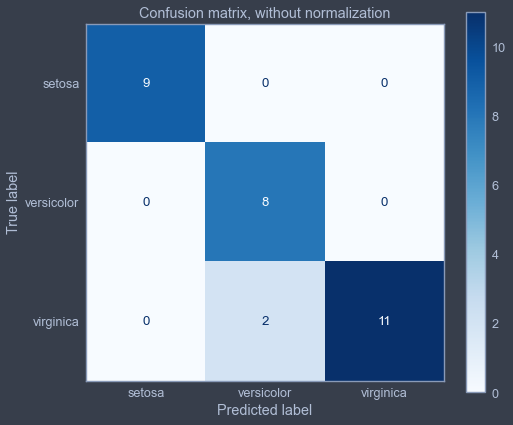

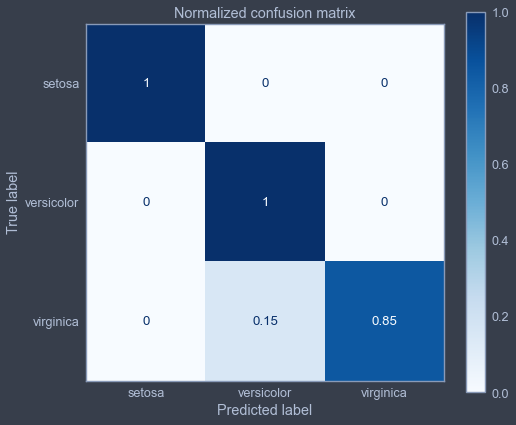

In [10]:
from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", grid=False)

# calculate confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(trained_GB, x_val, y_val,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### for XGboost:

In [11]:
# calculate precision
precision_XGboost = precision_score(y_val, y_pred_XGboost, average="macro")

print(f"precision_XGboost: {precision_XGboost}")

precision_XGboost: 0.9629629629629629


In [12]:
# calculate recall
recall_XGboost = recall_score(y_val, y_pred_XGboost, average="macro")

print(f"recall_XGboost: {recall_XGboost}")

recall_XGboost: 0.9743589743589745


In [13]:
# calculate F1 score
f1_XGboost = f1_score(y_val, y_pred_XGboost, average="macro")

print(f"F1_XGboost: {f1_XGboost}")

F1_XGboost: 0.9670588235294119


In [14]:
# calculate confusion matrix
cm_XGboost = confusion_matrix(y_val, y_pred_XGboost)

print(f"conf_mat_XGboost: {cm_XGboost}")

conf_mat_XGboost: [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]


### Compare Gradient Boost & XGboost Algorithm According to Evaluation Part Results:

Write your analysis here: